In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf

2024-12-16 19:19:14.158502: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-16 19:19:14.268393: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-16 19:19:14.364981: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734387554.479198    4523 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734387554.506862    4523 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-16 19:19:14.716042: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [3]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
farent = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

Construcción de la red neuronal con keras

In [9]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential, Input, optimizers


modelo = Sequential([
    Input(shape=[1]),
    Dense(units=1)
])


In [10]:

modelo.compile(optimizer= optimizers.Adam(0.1), loss='mean_squared_error')

Se comienza entrenamiento

In [11]:
print('Comenzando a entrenar')
historial = modelo.fit(celsius, farent, epochs=1000, verbose=False)
print('Modelo entrenado')

Comenzando a entrenar
Modelo entrenado


Ver resultado de la función de pérdida

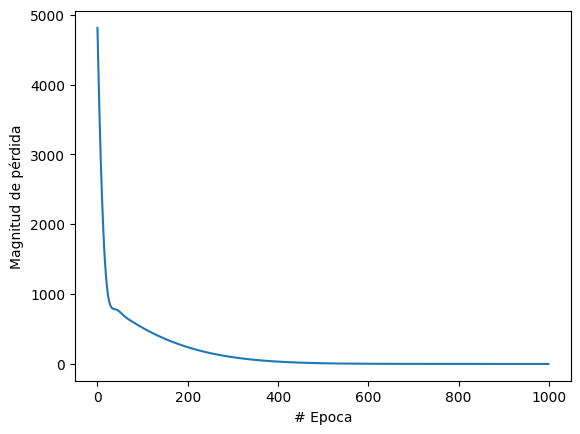

In [12]:
import matplotlib.pyplot as plt
plt.xlabel('# Epoca')
plt.ylabel('Magnitud de pérdida')
plt.plot(historial.history['loss'])

Se observa que al ser 1000 vueltas, es mucho (eje x), entre 500, 600 parece ser suficiente

Probando la predicción

In [23]:
resultado = modelo.predict(np.array([100]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


In [29]:
print(f'La conversión de 100 grados Celcius a Farent es {resultado[0][0]:.0f}')

La conversión de 100 grados Celcius a Farent es 212


Para entregar pero esta vez con 2 capas ocultas

In [39]:
# Definir el modelo con 2 capas ocultas
modelo = Sequential([
    Input(shape=[1]),      
    Dense(units=5, activation='relu'),  # Primera capa oculta
    Dense(units=3, activation='relu'),   # Segunda capa oculta
    Dense(units=1)                      # Capa de salida
])



In [40]:

# Compilar y entrenar el modelo
modelo.compile(optimizer= optimizers.Adam(0.1), loss='mean_squared_error')


In [41]:
print("Comenzando a entrenar...")
historial = modelo.fit(celsius, farent, epochs=1000, verbose=False)
print("Modelo entrenado.")

Comenzando a entrenar...
Modelo entrenado.


Revisamos su aprendizaje

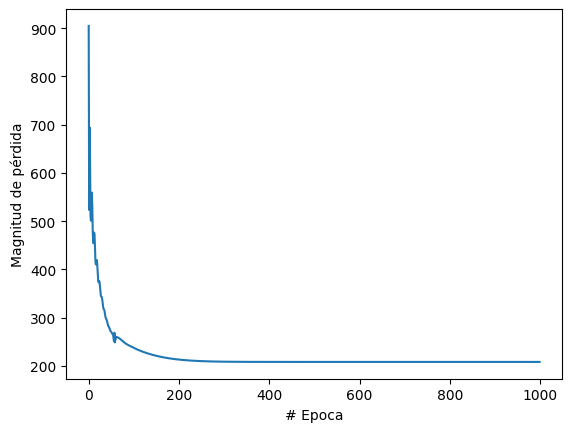

In [42]:
import matplotlib.pyplot as plt
plt.xlabel('# Epoca')
plt.ylabel('Magnitud de pérdida')
plt.plot(historial.history['loss'])


Se observa que aprende mas rápido, entre 300 y 400 app

In [43]:
# Realizar predicción
resultado = modelo.predict(np.array([100]))
print(f"Predicción para 100 grados Celsius: {resultado[0][0]} grados Fahrenheit")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Predicción para 100 grados Celsius: 211.62620544433594 grados Fahrenheit
